In [3]:
scwid ="066500110010.001" # http://odahub.io/ontology/integral#ScWID
emin=10.
emax=900.
nbins=100

In [4]:
if emin<0:
    raise Exception("emin can not be <0! got: %lg"%emin)

In [5]:
from ftplib import FTP
import astropy.io.fits as fits
from io import StringIO
import os
from nb2workflow.workflows import WorkflowException

In [6]:
if len(scwid) != 16:
    raise WorkflowException("bad scwid: "+scwid)

In [7]:
fn="events.fits"
os.system("wget ftp://isdcarc.unige.ch/arc/rev_3/scw/"+scwid[:4]+"/"+scwid+"/isgri_events.fits.gz -O "+fn)

os.system("ls -ltor")

events=fits.open(fn)[3].data

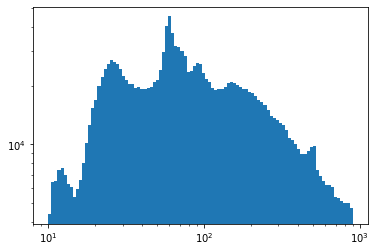

In [8]:
fn="spec.png"

import matplotlib.pyplot as plt
import numpy as np
plt.figure()
h=plt.hist(events['ISGRI_ENERGY'],np.logspace(np.log10(emin),np.log10(emax),nbins),log=True)
plt.semilogx()
plt.savefig(fn)

#Image(fn)

In [9]:
total_events=len(events['ISGRI_ENERGY'])
total_events

1722916

In [10]:
#import papermill as pm
#import base64

#pm.record("spectrum",dict(filename=fn,content=base64.b64encode(open(fn).read())))


In [11]:
spectrum_png = fn # http://odahub.io/ontology/preview/png
spectrum = h[0].tolist() # http://odahub.io/ontology/preview/png
total_events 

1722916